# Introdução

### Neste estudo, nossa meta é mergulhar a fundo nas relações entre as características físicas de um imóvel. A ideia é entender, principalmente, o que há por detrás dos preços dos imóveis de São Paulo. A base estudada foi extraída do Kaggle. Buscaremos entender como a localização do imóvel pode influenciar em seu preço, dentre outras características.

### Então seja bem vindo à nosso estudo exploratório do mercado Imobiliário de São Paulo

#### Definição das colunas:
  #### . Endereço = Endereço do imóvel
  #### . Bairro = Bairro do imóvel
  #### . Área = área do imóvel
  #### . Quartos = Número de quartos do imóvel
  #### . Garagem = Números de vagas na garagem do imóvel
  #### . Aluguel = Valor mensal de aluguel
  #### . Tipo = tipo do imóvel (apto, casa, etc)
  #### . Total = Custo total do imóvel (aluguel + impostos e taxas)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_rows', 15)

In [2]:
data = pd.read_csv('data.csv')
data.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [3]:
data.shape

(11657, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


#### Não temos nenhum campo nulo e a amostra é de um tamanho razoável

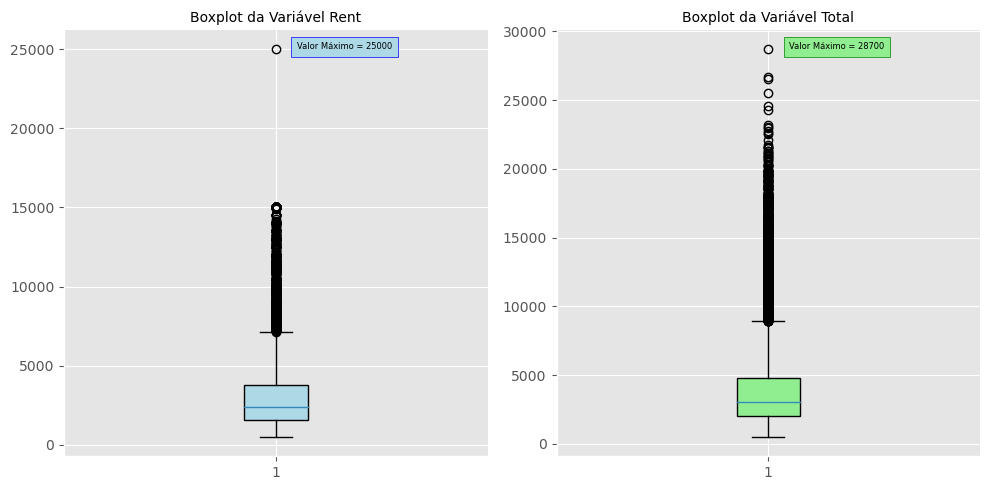

In [5]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

bp1 = ax[0].boxplot(data['rent'],patch_artist=True)
ax[0].set_title('Boxplot da Variável Rent', fontsize=10)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
bp1['boxes'][0].set_facecolor('lightblue')
max_rent = data['rent'].max()
ax[0].annotate(f'Valor Máximo = {max_rent}',
              xy=(1, max_rent),
              xytext=(1.05, max_rent),
              bbox=dict(facecolor='lightblue', edgecolor='blue'),
              fontsize=6)


bp2 = ax[1].boxplot(data['total'], patch_artist=True)
ax[1].set_title('Boxplot da Variável Total', fontsize=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
bp2['boxes'][0].set_facecolor('lightgreen')
max_total = data['total'].max()
ax[1].annotate(f'Valor Máximo = {max_total}',
              xy=(1, max_total),
              xytext=(1.05, max_total),
              bbox=dict(facecolor='lightgreen', edgecolor='green'),
              fontsize=6)

plt.tight_layout()
plt.show()

## temos diversos outliers, inclusive, embora a mediana esteja a baixo de 5mil, vemos destaque em valores máximos de ambos que chegam a bater a casa dos 20mil

### abaixo podemos ver o histograma com a mediana indicada

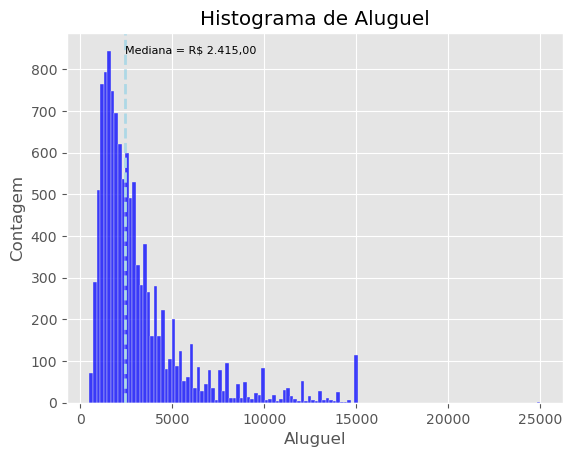

In [6]:
mediana_rent = data['rent'].median()
mediana_rent_format = ('R$ {:,.2F}'.format(mediana_rent).replace(',','v').replace('.',',').replace('v','.'))

sns.histplot(data.rent, color='blue')
plt.axvline(mediana_rent, color='lightblue', linestyle='dashed', linewidth=2)
plt.title('Histograma de Aluguel')
plt.xlabel('Aluguel')
plt.ylabel('Contagem')
plt.text(x=data.rent.median(), y = 840, s=f'Mediana = {mediana_rent_format}', fontsize=8)
plt.show()

### Vamos fazer uma última avaliação do aluguel nas descrições abaixo. A Média dos aluguéis é de 3mil e seu desvio padrão de 2mil- abre-se espaço para verificar os aluguéis de 500 reais

In [7]:
data[['rent','total']].describe().T

,count,mean,std,min,25%,50%,75%,max
rent,11657.0,3250.814789,2650.711557,500.0,1590.0,2415.0,3800.0,25000.0
total,11657.0,4080.030625,3352.480274,509.0,1996.0,3057.0,4774.0,28700.0


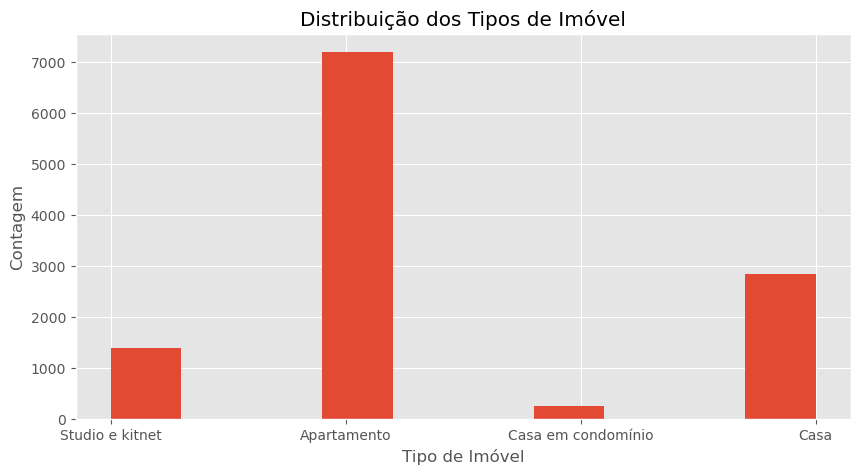

In [8]:

fig,ax = plt.subplots(figsize=(10,5))
ax.hist(data['type'])
ax.set_title('Distribuição dos Tipos de Imóvel')
ax.set_xlabel('Tipo de Imóvel')
ax.set_ylabel('Contagem')
plt.show()

### Dos tipos de imóvel o que se destaca, como esperado de São Paulo, é a quantidade de apartamentos. Também vale destacar que as Casas de Condomínio são poucas, demonstrando a desigualdade de renda já que as Casas de Condomínio são mais caras 

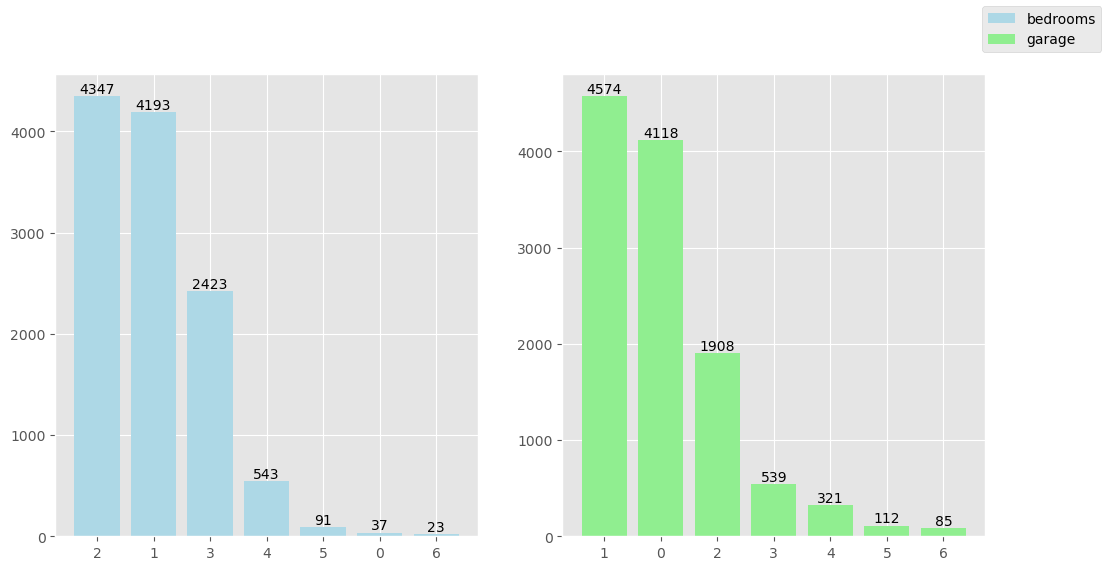

In [9]:
contagem_quartos = data['bedrooms'].value_counts()
contagem_garagens = data['garage'].value_counts()
quartos = ['2','1','3','4','5','0','6']
garagens = ['1','0','2','3','4','5','6']



fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].bar(x=quartos, height=contagem_quartos.values, color='lightblue' )
ax[1].bar(x=garagens, height=contagem_garagens.values, color='lightgreen' )
fig.legend(['bedrooms','garage'])

for v, i in enumerate(contagem_quartos.values):
    ax[0].text(v,i,str(i),ha='center',va='bottom')
    
for v, i in enumerate(contagem_garagens.values):
    ax[1].text(v,i,str(i),ha='center',va='bottom')


fig.show()

### Vemos que o destaque são imóveis de 2 quartos e uma garagem, isso pode indicar que quanto mais quartos e garagens a influência nos preços de rent (aluguel) é bem maior. Podendo responder o motivo dos outliers

In [10]:
from tabulate import tabulate

desc = data['area'].describe()
desc['var'] = data['area'].var()
desc['kurt'] = data['area'].kurt()
desc = pd.DataFrame(desc)
print(tabulate(desc, headers='keys',tablefmt='psql', showindex=True))

+-------+------------+
|       |       area |
|-------+------------|
| count | 11657      |
| mean  |    84.6557 |
| std   |    74.0205 |
| min   |     0      |
| 25%   |    40      |
| 50%   |    60      |
| 75%   |    96      |
| max   |   580      |
| var   |  5479.04   |
| kurt  |     8.3946 |
+-------+------------+


### Com base nas estatísticas geradas, podemos notar que o tamanho médio das áreas dos imóveis de SP é aproximadamente 84,6 metros quadrados. No entando o desvio padrão é de 74 metros quadrados, indicando uma grande variação de áreas nos imóveis de SP.

### Também percebemos que há anomalias nos dados já que não há imóveis de 0 metros quadrados tendo que serem tratadas 

### O valor de curtoise indica uma inclinação de dados à direita, indicando outliers ao lado direito da distribuição. Além disso os imóveis se concentram entre 40 e 96 metros quadrados. 

#### Agora vamos conhecer mais um pouco nossos dados, avaliando os bairros

In [13]:
print(f'Temos um total de {data.district.nunique()} bairros na amostra')

Temos um total de 1199 bairros na amostra


In [16]:
## Quais bairros com o maior números de imóveis?

top_districts = data.groupby('district').size().sort_values(ascending=False).reset_index(name='contagem')[:10]
print('Os 10 distritos com mais imóveis')
top_districts

Os 10 distritos com mais imóveis


,district,contagem
0,Bela Vista,352
1,Vila Mariana,232
2,Jardim Paulista,220
3,Centro,178
4,Pinheiros,159
5,Consolação,157
6,Santana,152
7,Mooca,147
8,Santo Amaro,146
9,Brás,141


### a grande maioria se concentra em Bela Vista

In [27]:
## E sobre os preços de aluguel?
top_rent = data.groupby('district')['rent'].mean().sort_values(ascending=False)[:10].reset_index()
top_rent['rent'] = top_rent['rent']\
.apply(lambda x: 'R$ {:,.2f}'.format(x))
print('As 10 maiores médias de aluguéis')
print(top_rent)

As 10 maiores médias de aluguéis
                            district          rent
0                       Jardim Tango  R$ 15,000.00
1        Alphaville Residencial Dois  R$ 15,000.00
2        Alphaville Residencial Plus  R$ 15,000.00
3     Residencial Cinco (alphaville)  R$ 13,600.00
4          Alphaville Residencial Um  R$ 13,500.00
5                      Cidade Jardim  R$ 13,000.00
6                           Pacaembu  R$ 12,054.00
7                      Chácara Meyer  R$ 12,000.00
8         Centro Empresarial Tamboré  R$ 11,833.33
9  Jardim Vitoria Regia (zona Oeste)  R$ 11,820.00


### Jardim Tango e Alphaville se destacam podendo idicar serem bairros de alto padrão de vida

In [38]:
top_rent_s_alphaville = data.groupby('district')['rent'].mean().reset_index()
top_rent_s_alphaville = top_rent_s_alphaville[~top_rent_s_alphaville['district'].str.lower().str.contains('alphaville')]
top_rent_s_alphaville = top_rent_s_alphaville.sort_values('rent',ascending=False)[:10]
top_rent_s_alphaville['rent'] = top_rent_s_alphaville['rent']\
.apply(lambda x: 'R$ {:,.2f}'.format(x))
print('As 10 maiores médias de aluguéis sem Alphaville')
print(top_rent_s_alphaville)

As 10 maiores médias de aluguéis sem Alphaville
                              district          rent
475                       Jardim Tango  R$ 15,000.00
101                      Cidade Jardim  R$ 13,000.00
577                           Pacaembu  R$ 12,054.00
82                       Chácara Meyer  R$ 12,000.00
70          Centro Empresarial Tamboré  R$ 11,833.33
505  Jardim Vitoria Regia (zona Oeste)  R$ 11,820.00
533                 Jardim dos Estados  R$ 11,583.33
248                    Jardim Cordeiro  R$ 11,250.00
85               Chácara Santo Antônio  R$ 10,650.00
83                Chácara Monte Alegre  R$ 10,205.00


#### Vamos analisar em um gráfico de barras

In [42]:
top_rent_s_alphaville = data.groupby('district')['rent'].mean().reset_index()
top_rent_s_alphaville = top_rent_s_alphaville[~top_rent_s_alphaville['district'].str.lower().str.contains('alphaville')]
top_rent_s_alphaville = top_rent_s_alphaville.sort_values('rent',ascending=False)[:10]
fig = px.bar(top_rent_s_alphaville,
             y='district',
             x='rent',
             orientation='h',
             title='Top 10 Distrítos com a maior média de aluguel - Sem Alphaville',
             labels={'rent':'Média de Aluguel (R$)', 'district':'Distrito'},
             color='rent')
fig.update_yaxes(autorange='reversed')
fig.show()

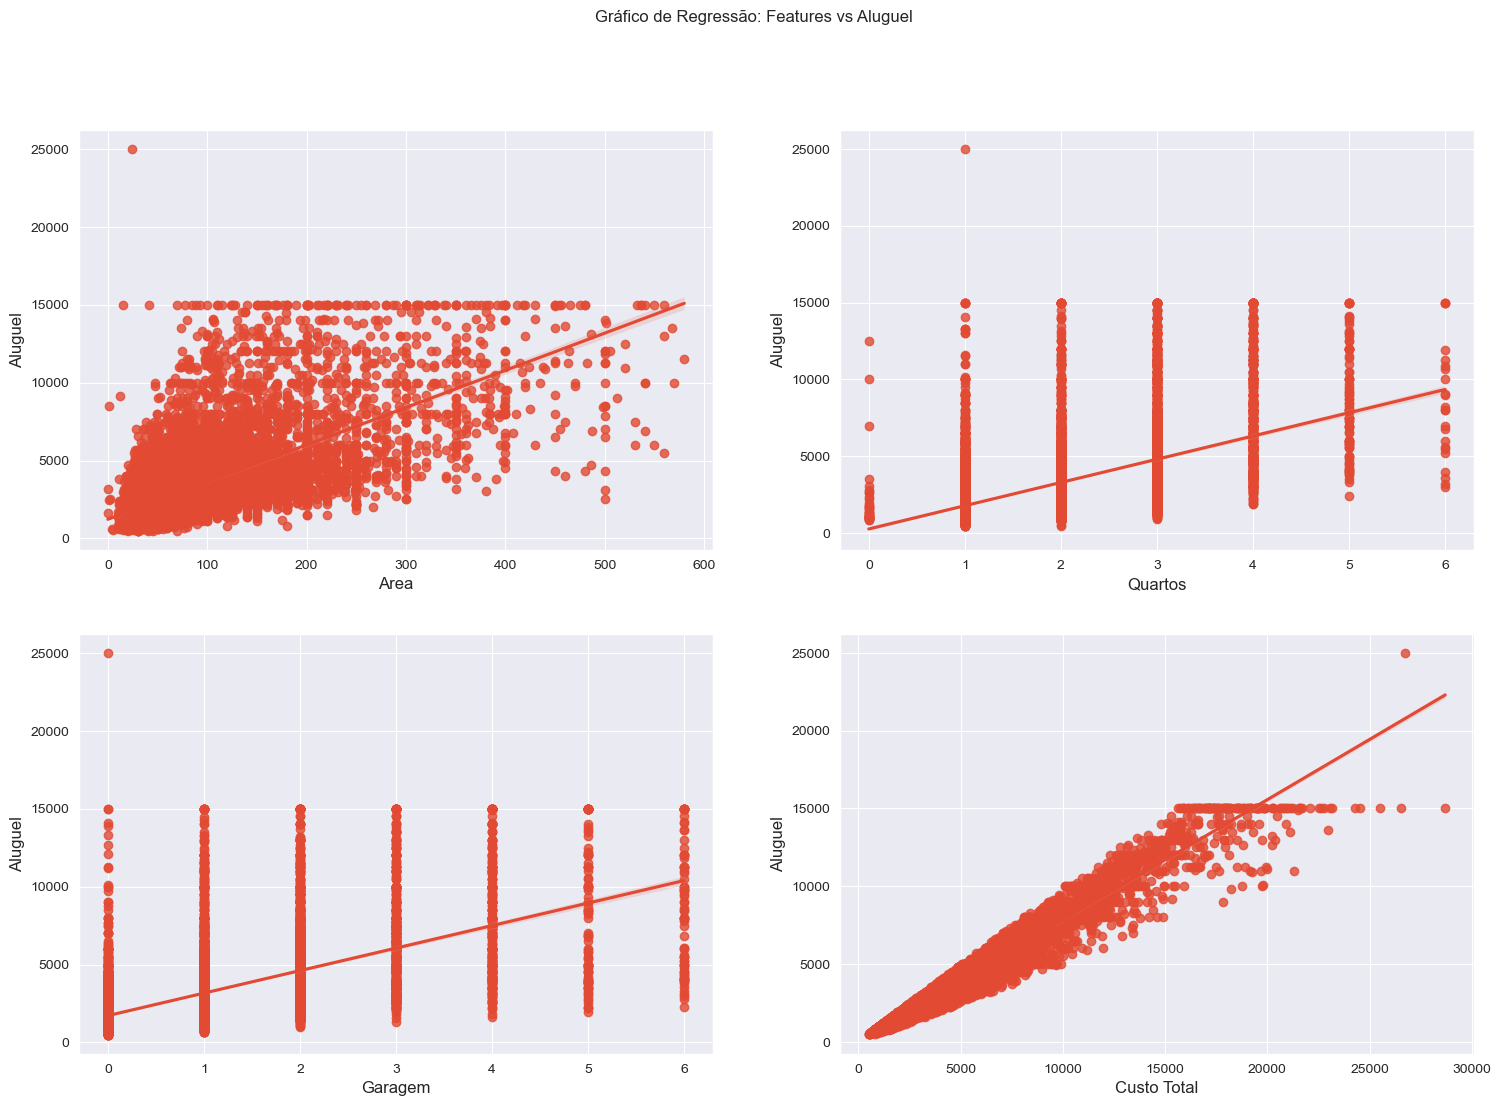

In [47]:
sns.set_style('darkgrid')

fig,ax = plt.subplots(2,2,figsize=(18,12))

_ = sns.regplot(x='area', y='rent', data=data, ax=ax[0,0])
_ = sns.regplot(x='bedrooms', y='rent', data=data,ax =ax[0,1])
_ = sns.regplot(x='garage', y='rent', data=data, ax=ax[1,0])
_ = sns.regplot(x='total', y='rent', data=data, ax=ax[1,1])

ax[0,0].set_xlabel('Area')
ax[0,0].set_ylabel('Aluguel')
ax[0,1].set_xlabel('Quartos')
ax[0,1].set_ylabel('Aluguel')
ax[1,0].set_xlabel('Garagem')
ax[1,0].set_ylabel('Aluguel')
ax[1,1].set_xlabel('Custo Total')
ax[1,1].set_ylabel('Aluguel')

fig.suptitle('Gráfico de Regressão: Features vs Aluguel')
fig.show()

### Parece que há correlações fortes do Custo Total e do Aluguel

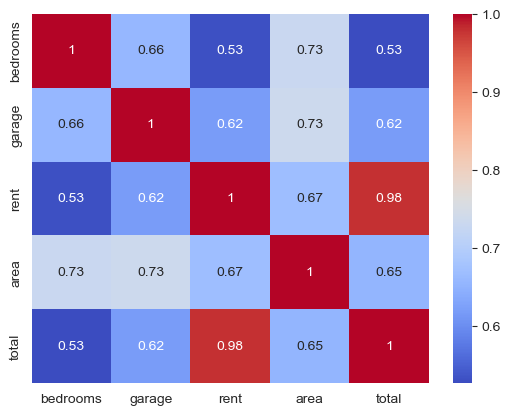

In [48]:
subset = data[['bedrooms','garage','rent','area','total']]

matrix = subset.corr()

sns.heatmap(matrix, annot=True, cmap='coolwarm')

plt.show()

#### Há correlações importantes como a área e garagens ou garagens e valor de aluguel (correlações positivas e fortes)